In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
s = Series([50,50,50])
s

0    50
1    50
2    50
dtype: int64

In [3]:
s.plot.pie()

In [4]:
%matplotlib inline

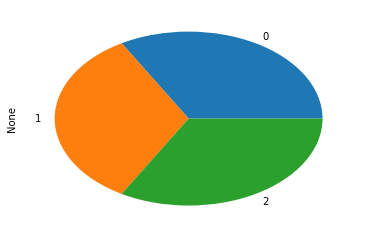

In [5]:
s.plot.pie()

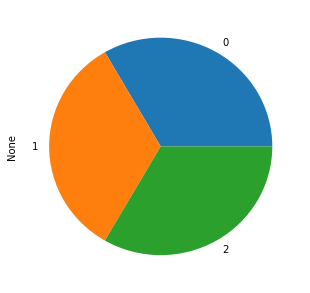

In [6]:
s.plot.pie(figsize=(5,5))

In [7]:
s = Series([50,20,30], index=['Schools', 'Hospitals', 'Fire'])
s

Schools      50
Hospitals    20
Fire         30
dtype: int64

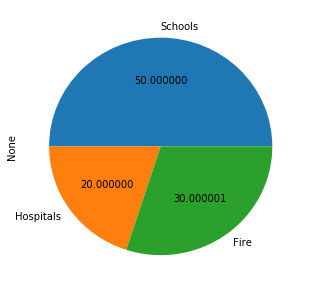

In [8]:
s.plot.pie(figsize=(5,5), autopct="%f")

In [9]:
s = Series([.2,.12,.3], index=['Schools', 'Hospitals', 'Fire'])
s

Schools      0.20
Hospitals    0.12
Fire         0.30
dtype: float64

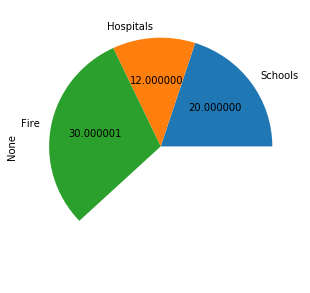

In [11]:
s.plot.pie(figsize=(5,5), autopct="%f")

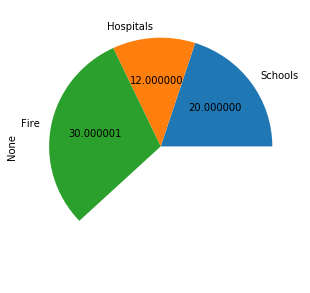

In [12]:
s.plot.pie(figsize=(5,5), autopct="%f")

In [13]:
percents = s * 100 /sum(s)

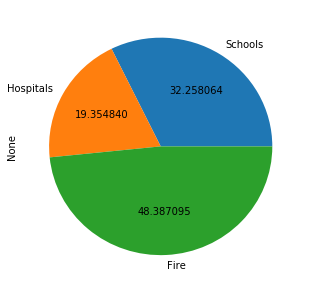

In [14]:
percents.plot.pie(figsize=(5,5), autopct="%f")

In [15]:
import sqlite3

In [16]:
c = sqlite3.connect('bus.db')

In [17]:
pd.read_sql("SELECT * from boarding LIMIT 10", c)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
5,5,1167,4,43.077867,-89.369993,2.23
6,6,1167,10,43.077867,-89.369993,0.11
7,7,1167,38,43.077867,-89.369993,1.36
8,8,1169,3,43.089707,-89.329817,18.90
9,9,1169,37,43.089707,-89.329817,1.35


In [18]:
df = pd.read_sql("SELECT Route, SUM(DailyBoardings) as ridership " +
                 "FROM boarding " +
                 "GROUP BY Route " +
                 "ORDER BY ridership DESC", c)

df.head()

,Route,ridership
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


In [19]:
ridership_df = df.set_index("Route")
ridership_df.head()

,ridership
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


In [20]:
df.head()

,Route,ridership
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


In [21]:
ridership = ridership_df['ridership']
ridership.head()

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: ridership, dtype: float64

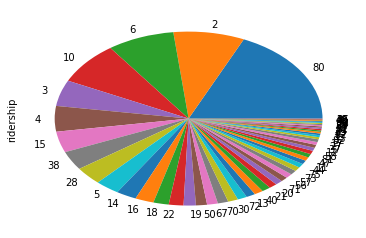

In [22]:
ridership.plot.pie()

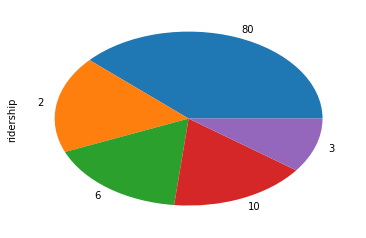

In [23]:
ridership.head(5).plot.pie()


In [24]:
other_ridership = sum(ridership) - sum(ridership.head(5))
other_ridership

29296.560000000012

In [25]:
series1 = ridership.head()

In [26]:
series1

Route
80    10211.79
2      4808.03
6      4537.02
10     4425.23
3      2708.55
Name: ridership, dtype: float64

In [27]:
series2 = Series([other_ridership], index =['other'])

In [28]:
series2

other    29296.56
dtype: float64

In [29]:
plot_data = pd.concat([series1, series2])

In [30]:
plot_data

80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
dtype: float64

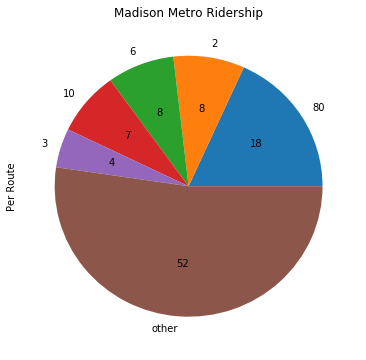

In [31]:
plot_data.plot.pie(figsize=(6,6), autopct="%d", label="Per Route", title="Madison Metro Ridership")

In [32]:
c.close()

In [33]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5
5,2,1.8,3.0
6,2,1.7,2.9
7,3,2.1,3.2
8,3,2.0,3.0
9,3,2.2,2.4


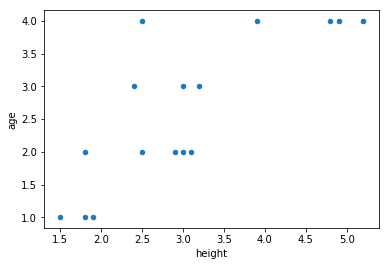

In [34]:
df.plot.scatter(x='height', y='age')

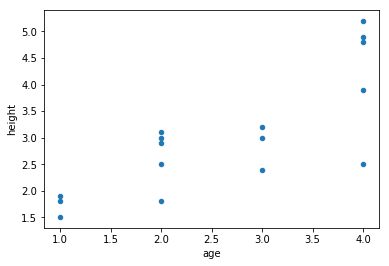

In [35]:
df.plot.scatter(x='age', y='height')


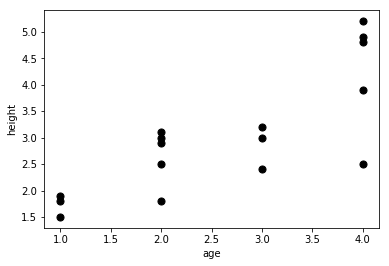

In [36]:
df.plot.scatter(x='age', y='height', c='black', s=50)

In [37]:
display = df['height'] * 25
display

0      37.5
1      47.5
2      45.0
3      45.0
4      62.5
5      75.0
6      72.5
7      80.0
8      75.0
9      60.0
10     77.5
11     62.5
12     97.5
13    122.5
14    130.0
15    120.0
Name: height, dtype: float64

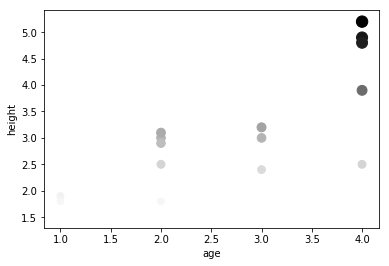

In [38]:
df.plot.scatter(x='age', y='height', c=display, s=display)


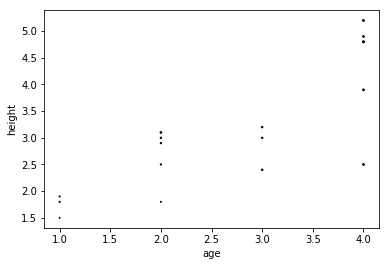

In [39]:
df.plot.scatter(x='age', y='height', s=df['diameter'], c='black')

In [40]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [41]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names=['sepal-len', 'sepal-wid', 'petal-len', 'petal-wid', 'name'])
df.head()


,sepal-len,sepal-wid,petal-len,petal-wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris_types = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for name in iris_types:
    rows = df[df['name'] == name]
    print(name, len(rows))

Iris-setosa 50
Iris-versicolor 50
Iris-virginica 50


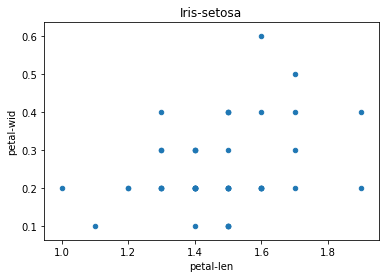

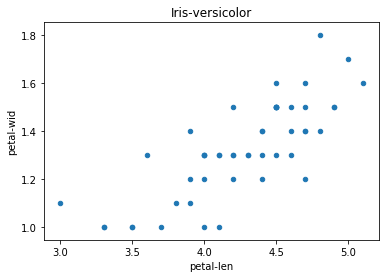

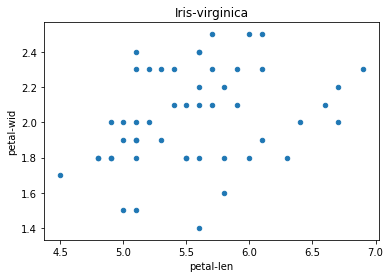

In [43]:
for name in iris_types:
    rows = df[df['name'] == name]
    rows.plot.scatter(x='petal-len', y='petal-wid', title=name)
    

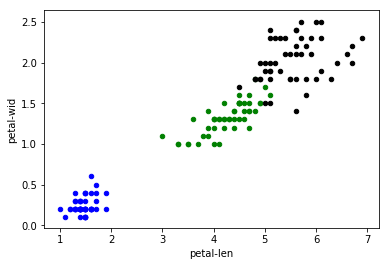

In [44]:
ax = df[df['name'] == 'Iris-setosa'].plot.scatter(x='petal-len', y='petal-wid', c='blue')
df[df['name'] == 'Iris-versicolor'].plot.scatter(x='petal-len', y='petal-wid', c='green', ax=ax)
df[df['name'] == 'Iris-virginica'].plot.scatter(x='petal-len', y='petal-wid', c='black', ax=ax)

In [45]:
s = Series([0,100,300,200,400])
s


0      0
1    100
2    300
3    200
4    400
dtype: int64

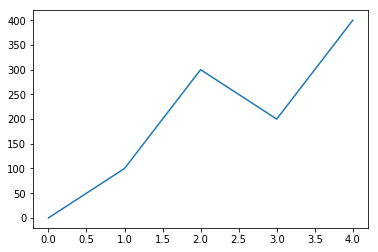

In [46]:
s.plot.line()

In [47]:
s = Series([0,100,300,200,400], index=[1,2,30,31,32])
s

1       0
2     100
30    300
31    200
32    400
dtype: int64

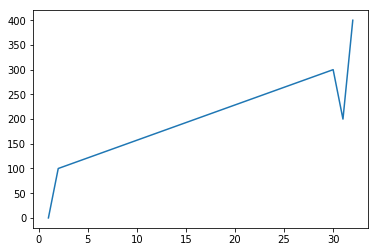

In [48]:
s.plot.line()

In [56]:
s = Series([0,100,300,200,400], index=[1,11,2,22,3])
s


1       0
11    100
2     300
22    200
3     400
dtype: int64

In [58]:
s1 = s.sort_index()

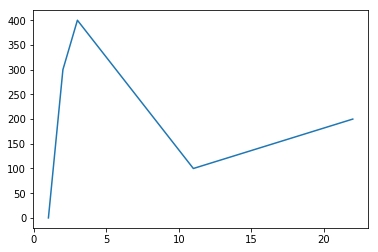

In [59]:
s1.plot.line()

In [60]:
df = DataFrame({
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})

df

,high,low
0,26,11
1,31,15
2,43,25
3,57,36
4,68,46
5,78,56
6,82,61
7,79,59
8,72,50
9,59,39


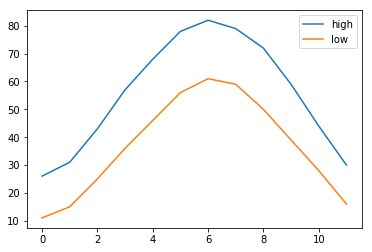

In [61]:
df.plot.line()

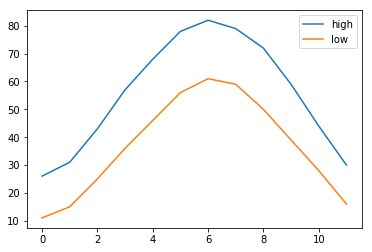

In [62]:
df.plot.line()


Text(0,0.5,'Temp (Fehrenheit)')

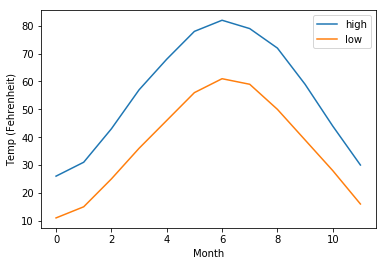

In [63]:
ax = df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')

In [64]:
c_df = DataFrame()
c_df["high"] = (df["high"] - 32) * (5/9)
c_df["low"] = (df["low"] - 32) * (5/9)
c_df

,high,low
0,-3.333333,-11.666667
1,-0.555556,-9.444444
2,6.111111,-3.888889
3,13.888889,2.222222
4,20.000000,7.777778
5,25.555556,13.333333
6,27.777778,16.111111
7,26.111111,15.000000
8,22.222222,10.000000
9,15.000000,3.888889


Text(0,0.5,'Temp (Celsius)')

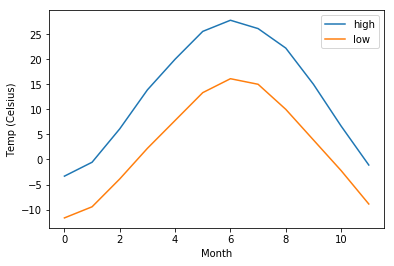

In [65]:
ax = c_df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Celsius)')

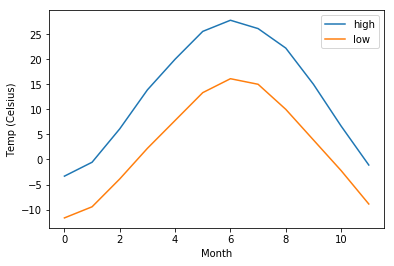

In [66]:
ax = c_df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Celsius)')
None

In [67]:

df = DataFrame({
    "month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "high": [26, 31, 43, 57, 68, 78, 82, 79, 72, 59, 44, 30],
    "low": [11, 15, 25, 36, 46, 56, 61, 59, 50, 39, 28, 16]
})

df = df.set_index("month")

df.head()

,high,low
month,,
Jan,26,11
Feb,31,15
Mar,43,25
Apr,57,36
May,68,46


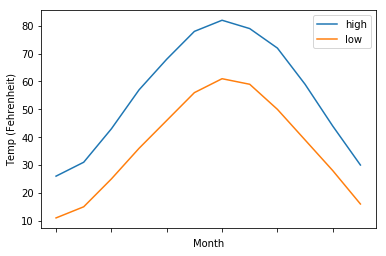

In [68]:
ax = df.plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

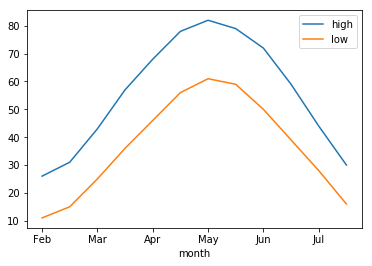

In [69]:
# careful, this is an example of a bad plot!
ax = df.plot.line()
ax.set_xticklabels(df.index)
None

In [70]:
ax.get_xticks()


array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.])

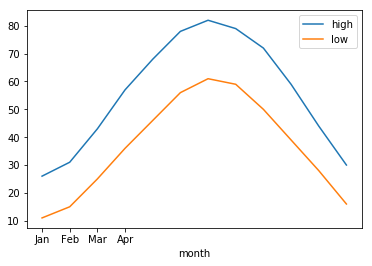

In [71]:
ax = df.plot.line()
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(df.index)
None

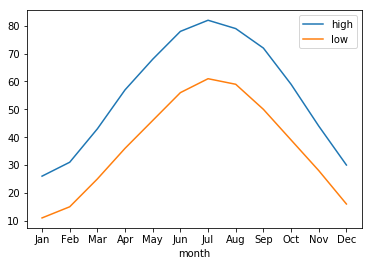

In [72]:

ax = df.plot.line()
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index)
None

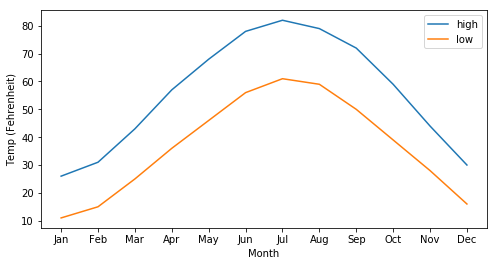

In [73]:

# approach 1: wider plot
ax = df.plot.line(figsize=(8,4)) # this is the (width,height)
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index)
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

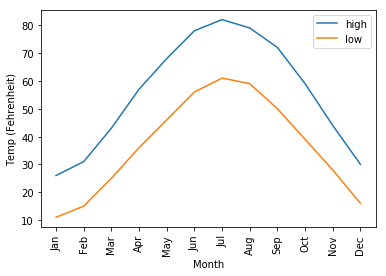

In [74]:

# approach 2: rotate ticks
ax = df.plot.line()
ax.set_xticks(range(len(df.index)))
ax.set_xticklabels(df.index, rotation=90) # 90 is in degrees
ax.set_xlabel('Month')
ax.set_ylabel('Temp (Fehrenheit)')
None

In [76]:
df = pd.read_csv('Fire_Hydrants.csv')
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.498708,43.012660,379,NaN,NaN,WUPTB,2017-08-31T16:19:16.000Z,HYDR-2875-2,NaN,NaN,...,994.0,NaN,Pacer,1994.0,5.0,NaN,NaN,Blue,Madison Water Utility,NaN
1,-89.495715,43.012624,380,NaN,NaN,WUPTB,2017-08-31T16:19:16.000Z,HYDR-2875-5,NaN,NaN,...,987.0,NaN,Pacer,1994.0,5.0,NaN,NaN,Blue,Madison Water Utility,NaN
2,-89.496688,43.012624,381,NaN,NaN,WUPTB,2017-08-31T16:19:16.000Z,HYDR-2875-4,NaN,NaN,...,989.0,NaN,Pacer,1994.0,5.0,NaN,NaN,Blue,Madison Water Utility,NaN
3,-89.496939,43.012102,382,NaN,NaN,WUPTB,2017-08-31T16:19:16.000Z,HYDR-2875-3,NaN,NaN,...,989.0,NaN,Pacer,1994.0,5.0,NaN,NaN,Blue,Madison Water Utility,NaN
4,-89.498820,43.012099,383,NaN,NaN,WUPTB,2017-08-31T16:19:16.000Z,HYDR-2875-1,NaN,NaN,...,993.0,NaN,Pacer,NaN,5.0,NaN,NaN,Blue,Madison Water Utility,NaN


In [77]:
df['nozzle_color'].head()

0    Blue
1    Blue
2    Blue
3    Blue
4    Blue
Name: nozzle_color, dtype: object

In [78]:
df['nozzle_color'].value_counts()

blue      5779
Blue      1147
Green      319
Orange      74
BLUE        45
Red          9
green        9
orange       4
C            1
ORANGE       1
GREEN        1
white        1
Name: nozzle_color, dtype: int64

In [79]:
df['nozzle_color'].str.upper().value_counts()

BLUE      6971
GREEN      329
ORANGE      79
RED          9
C            1
WHITE        1
Name: nozzle_color, dtype: int64

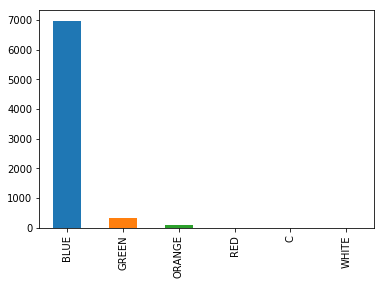

In [80]:
counts = df['nozzle_color'].str.upper().value_counts()
counts.plot.bar()

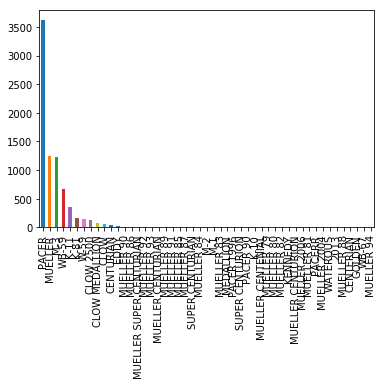

In [81]:
counts = df['Style'].str.upper().value_counts()
counts.plot.bar()

In [82]:
counts

PACER                      3618
MUELLER                    1238
M-3                        1234
WB-59                       661
K-11                        349
K-81                        165
W-59                        150
CLOW 2500                   123
CLOW MEDALLION               70
CLOW                         50
CENTURIAN                    35
EDDY                         23
MUELLER 90                   13
MUELLER 86                   13
MUELLER SUPER CENTURIAN      12
MUELLER 92                   12
MUELLER 93                   11
MUELLER CENTURIAN             9
MUELLER 89                    9
MUELLER 91                    9
MUELLER 85                    8
MUELLER 87                    7
SUPER CENTURIAN               6
MUELLER 84                    6
M-2                           6
M-1                           5
MUELLER 83                    4
MEDALLION                     4
PACER 1996                    3
SUPER CENTURION               3
PACER 90                      3
K-10    

In [94]:
top10 = counts[:10]
top10

PACER             3618
MUELLER           1238
M-3               1234
WB-59              661
K-11               349
K-81               165
W-59               150
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
Name: Style, dtype: int64

In [95]:
others = sum(counts[10:])

In [96]:
top10["other"] = others

In [97]:
top10

PACER             3618
MUELLER           1238
M-3               1234
WB-59              661
K-11               349
K-81               165
W-59               150
CLOW 2500          123
CLOW MEDALLION      70
CLOW                50
other              225
Name: Style, dtype: int64

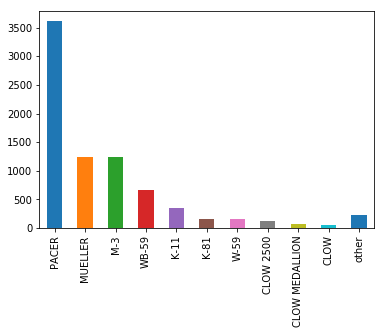

In [93]:
top_ten.plot.bar()

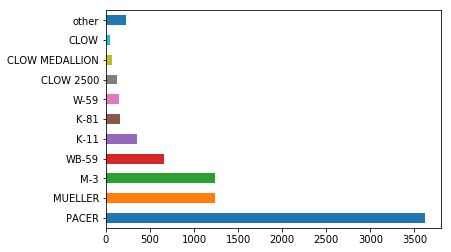

In [98]:
top10.plot.barh()


In [99]:
pacer_years = df[df['Style'] == 'Pacer']['year_manufactured']
pacer_years.head()

0    1994.0
1    1994.0
2    1994.0
3    1994.0
4       NaN
Name: year_manufactured, dtype: float64

In [100]:
pacer_decades = pacer_years // 10 * 10
pacer_decades.head()

0    1990.0
1    1990.0
2    1990.0
3    1990.0
4       NaN
Name: year_manufactured, dtype: float64

In [101]:
pacer_decades.value_counts()

2000.0    1730
1990.0     845
2010.0     503
1980.0      21
1960.0       1
Name: year_manufactured, dtype: int64

In [102]:
other_decades = df[df['Style'] != 'Pacer']['year_manufactured'] // 10 * 10
other_decades.value_counts()

2010.0    1225
1980.0     935
1970.0     574
1990.0     431
1950.0     371
1960.0     347
2000.0     217
1940.0      66
1930.0       9
1900.0       1
Name: year_manufactured, dtype: int64

In [103]:
pacer_df = DataFrame({
    "pacer":pacer_decades.value_counts(), 
    "other":other_decades.value_counts()
})
pacer_df

,pacer,other
1900.0,NaN,1
1930.0,NaN,9
1940.0,NaN,66
1950.0,NaN,371
1960.0,1.0,347
1970.0,NaN,574
1980.0,21.0,935
1990.0,845.0,431
2000.0,1730.0,217
2010.0,503.0,1225


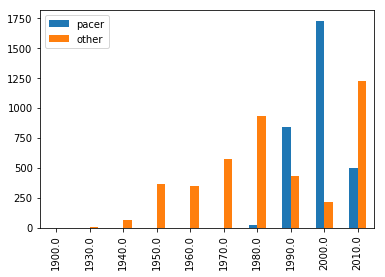

In [104]:
pacer_df.plot.bar()

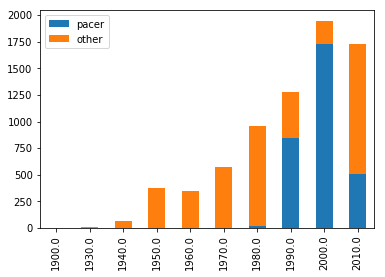

In [105]:
pacer_df.plot.bar(stacked=True)


In [ ]:
t = np.arange(0, 10, .5)

plot(t, p1 * (math.e ** (.01 * t)))